# 1. Configuración inicial


In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Comprensión Inicial de los Datos

In [3]:
# Configurar estilo de visualizaciones
sns.set_theme(style="whitegrid")             # estilo global
plt.rcParams['figure.figsize'] = (10, 6)     # tamaño por defecto (más legible)
%matplotlib inline

In [9]:
# Cargar el dataset
df = pd.read_csv("vitaminas.csv")

In [10]:

display(df.head(10))
display(df.info())            # tipos y non-null
display(df.describe(include='all').T)   # estadísticas resumen

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb
5,2020-01-06,BCAA,Amino Acid,154,41.19,6343.26,0.13,1,UK,Walmart
6,2020-01-06,Creatine,Performance,134,32.49,4353.66,0.05,1,UK,Walmart
7,2020-01-06,Zinc,Mineral,147,46.68,6861.96,0.19,0,Canada,Amazon
8,2020-01-06,Collagen Peptides,Protein,147,10.96,1611.12,0.06,2,USA,Amazon
9,2020-01-06,Magnesium,Mineral,134,20.76,2781.84,0.00,0,Canada,Amazon


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,4384,274,2020-01-06,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product Name,4384,16,Whey Protein,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,4384,10,Vitamin,822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Units Sold,4384.0,NaN,NaN,NaN,150.200274,12.396099,103.0,142.0,150.0,158.0,194.0
Price,4384.0,NaN,NaN,NaN,34.781229,14.198309,10.0,22.5975,34.72,46.7125,59.97
Revenue,4384.0,NaN,NaN,NaN,5226.569446,2192.491946,1284.0,3349.3725,5173.14,7009.96,10761.85
Discount,4384.0,NaN,NaN,NaN,0.124398,0.071792,0.0,0.06,0.12,0.19,0.25
Units Returned,4384.0,NaN,NaN,NaN,1.531478,1.258479,0.0,1.0,1.0,2.0,8.0
Location,4384,3,Canada,1507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform,4384,3,iHerb,1499,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Verificar dimensiones del dataset
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset tiene 4384 filas y 10 columnas


In [ ]:
# separamos columnas numericas y categoricas
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category','bool']).columns.tolist()
print("Numéricas:", num_cols)
print("Categoricas:", cat_cols)

Numéricas: ['units_sold', 'price', 'revenue', 'discount', 'units_returned']
Categoricas: ['date', 'product_name', 'category', 'location', 'platform']


# 3. Análisis de Valores Faltantes

Limpieza básica de nombres de columnas

In [20]:
df.columns = (df.columns
                .str.strip()
                .str.lower()
                .str.replace(' ', '_')
                .str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))
df.columns


Index(['date', 'product_name', 'category', 'units_sold', 'price', 'revenue',
       'discount', 'units_returned', 'location', 'platform'],
      dtype='object')

Detección de valores faltantes y duplicados

,missing_count,missing_pct
date,0,0.0
product_name,0,0.0
category,0,0.0
units_sold,0,0.0
price,0,0.0
revenue,0,0.0
discount,0,0.0
units_returned,0,0.0
location,0,0.0
platform,0,0.0


Duplicados: 0


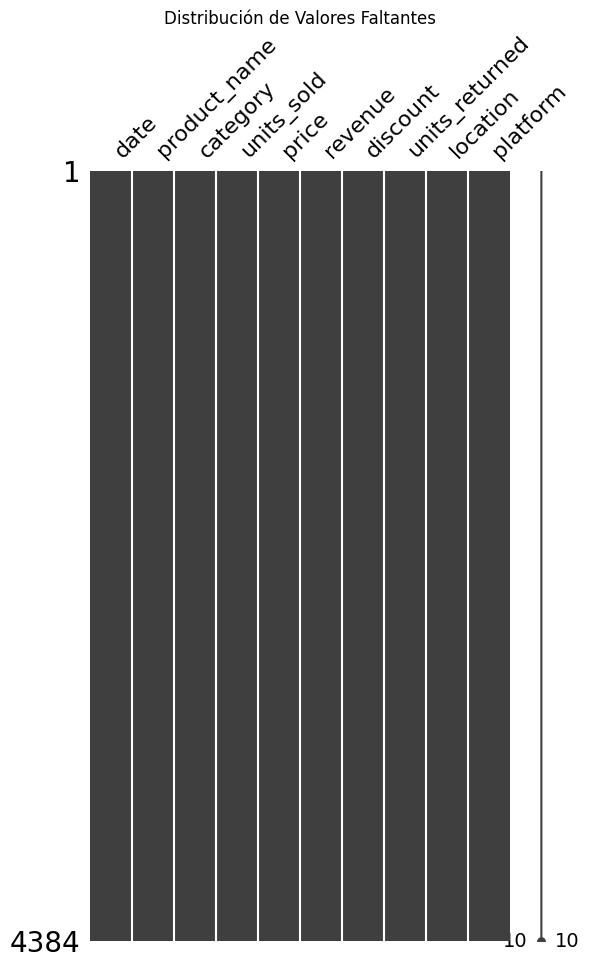

In [22]:
import missingno as msno

missing_count = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().mean()*100).round(2).sort_values(ascending=False)
display(pd.concat([missing_count, missing_pct], axis=1, keys=['missing_count','missing_pct']))

print("Duplicados:", df.duplicated().sum())

# Visualización de valores faltantes
msno.matrix(df, figsize=(6,10))

plt.title('Distribución de Valores Faltantes')
plt.show()

# 5. Análisis univariante — numéricas

--- Análisis de Columnas Numéricas ---

Analizando la columna: units_sold
count    4384.000000
mean      150.200274
std        12.396099
min       103.000000
25%       142.000000
50%       150.000000
75%       158.000000
max       194.000000
Name: units_sold, dtype: float64


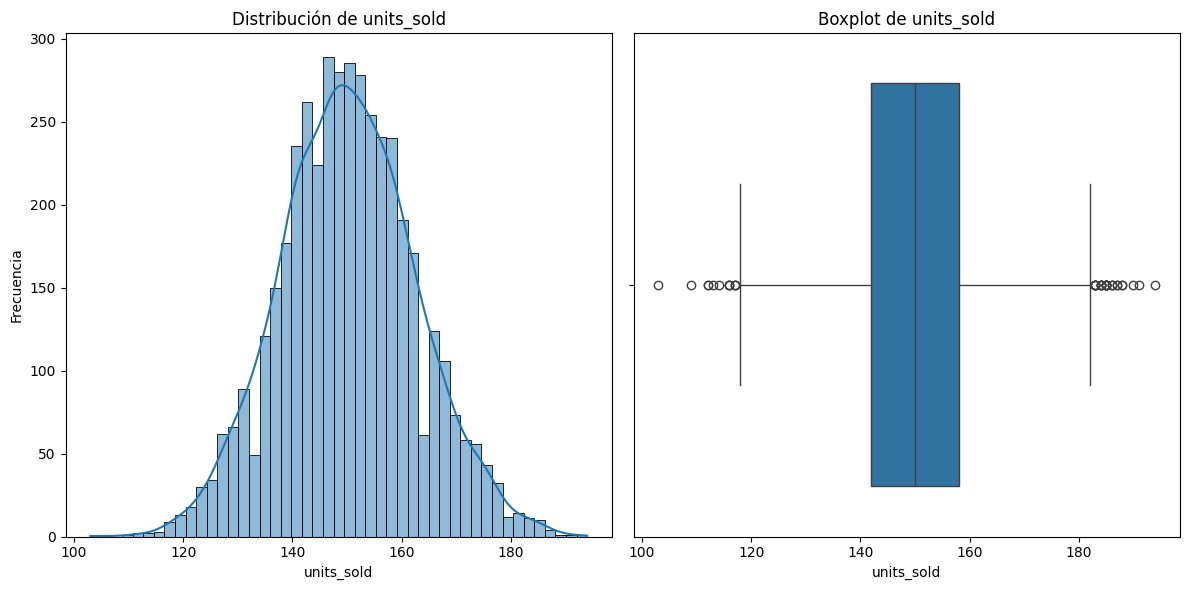


Analizando la columna: price
count    4384.000000
mean       34.781229
std        14.198309
min        10.000000
25%        22.597500
50%        34.720000
75%        46.712500
max        59.970000
Name: price, dtype: float64


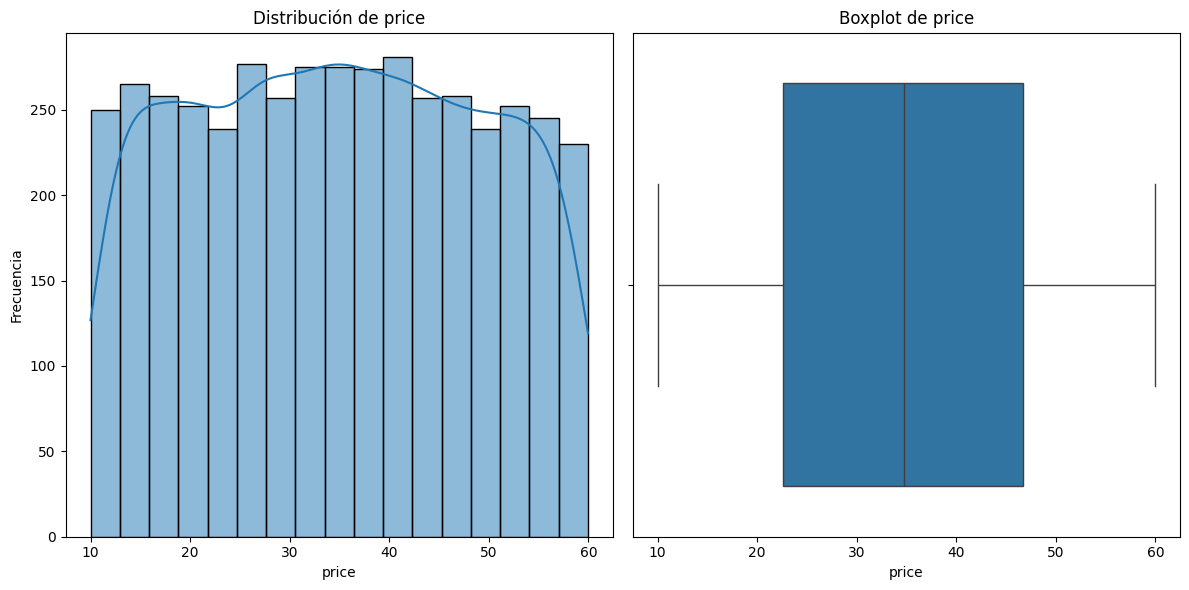


Analizando la columna: revenue
count     4384.000000
mean      5226.569446
std       2192.491946
min       1284.000000
25%       3349.372500
50%       5173.140000
75%       7009.960000
max      10761.850000
Name: revenue, dtype: float64


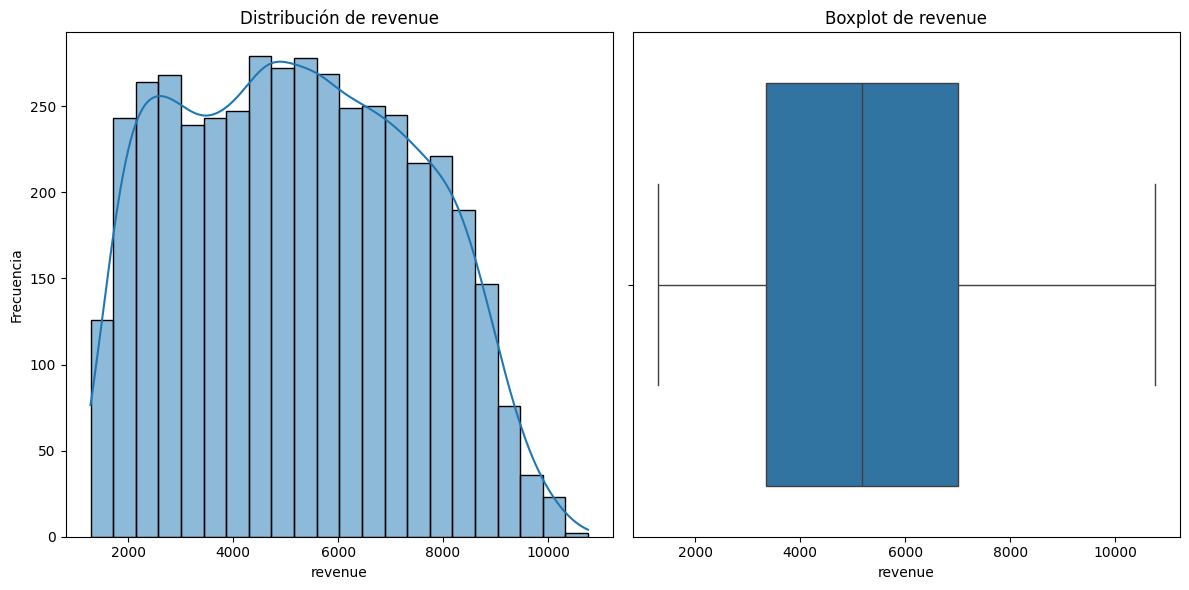


Analizando la columna: discount
count    4384.000000
mean        0.124398
std         0.071792
min         0.000000
25%         0.060000
50%         0.120000
75%         0.190000
max         0.250000
Name: discount, dtype: float64


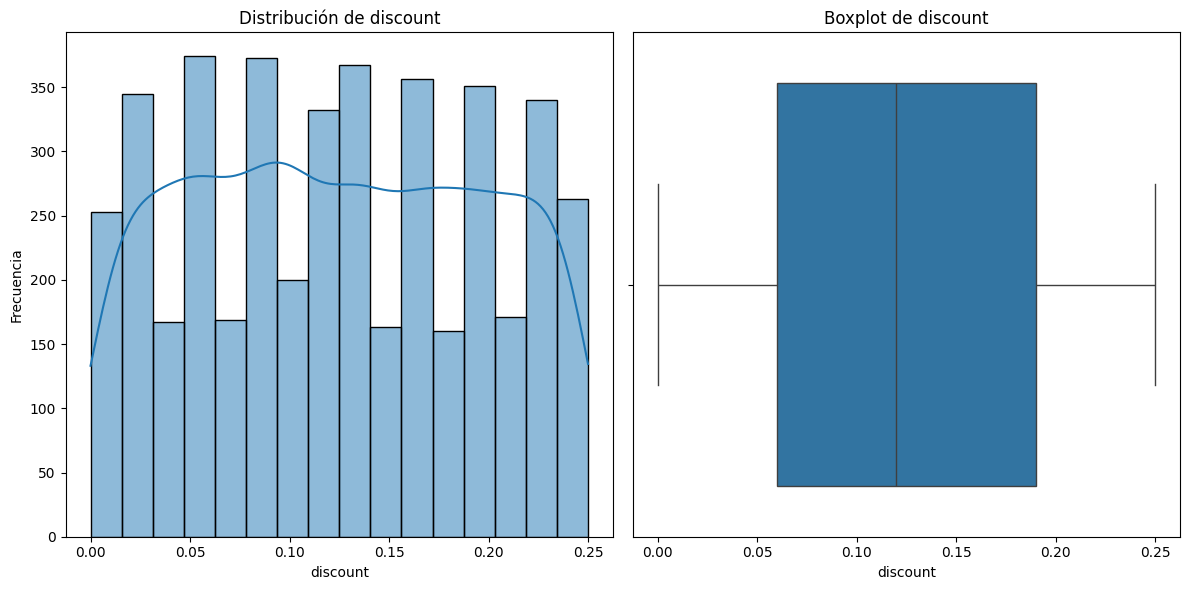


Analizando la columna: units_returned
count    4384.000000
mean        1.531478
std         1.258479
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: units_returned, dtype: float64


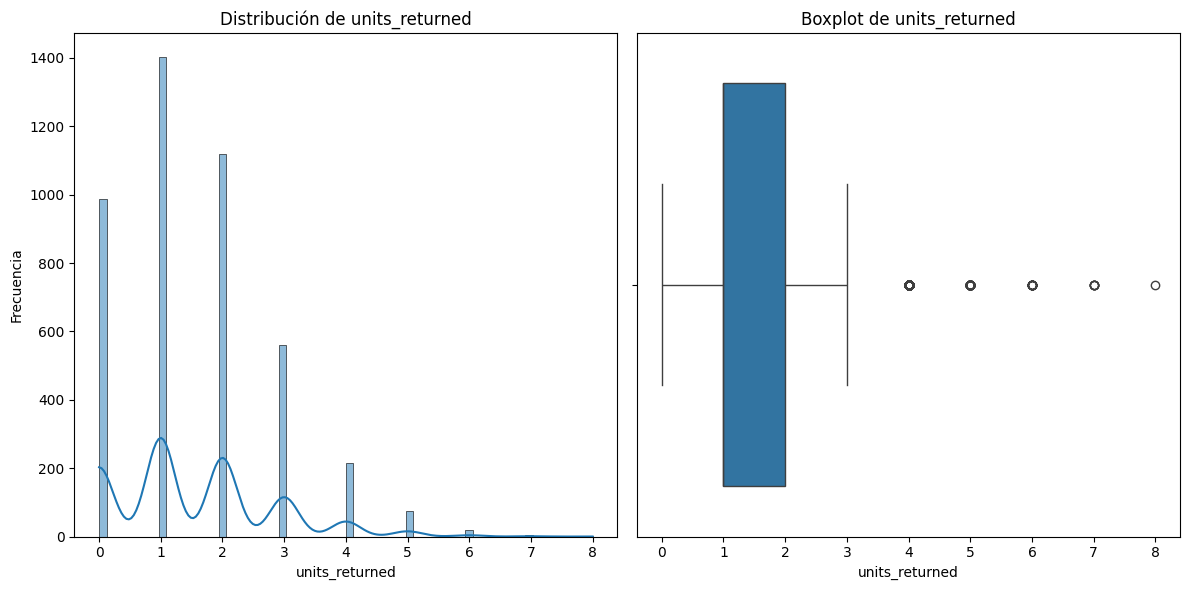

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['units_sold', 'price', 'revenue', 'discount', 'units_returned']

print("--- Análisis de Columnas Numéricas ---")

# Generar histogramas y boxplots para cada columna numérica
for col in num_cols:
    print(f"\nAnalizando la columna: {col}")

    # Resumen estadístico
    print(df[col].describe())

    # Crear una figura con dos subgráficos (histograma y boxplot)
    plt.figure(figsize=(12, 6))

    # Subgráfico 1: Histograma para la distribución
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

    # Subgráfico 2: Boxplot para la detección de outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

# Análisis de Columnas Categóricas


--- Análisis de Columnas Categóricas ---

Analizando la columna: product_name
product_name
Whey Protein          274
Vitamin C             274
Fish Oil              274
Multivitamin          274
Pre-Workout           274
BCAA                  274
Creatine              274
Zinc                  274
Collagen Peptides     274
Magnesium             274
Ashwagandha           274
Melatonin             274
Biotin                274
Green Tea Extract     274
Iron Supplement       274
Electrolyte Powder    274
Name: count, dtype: int64


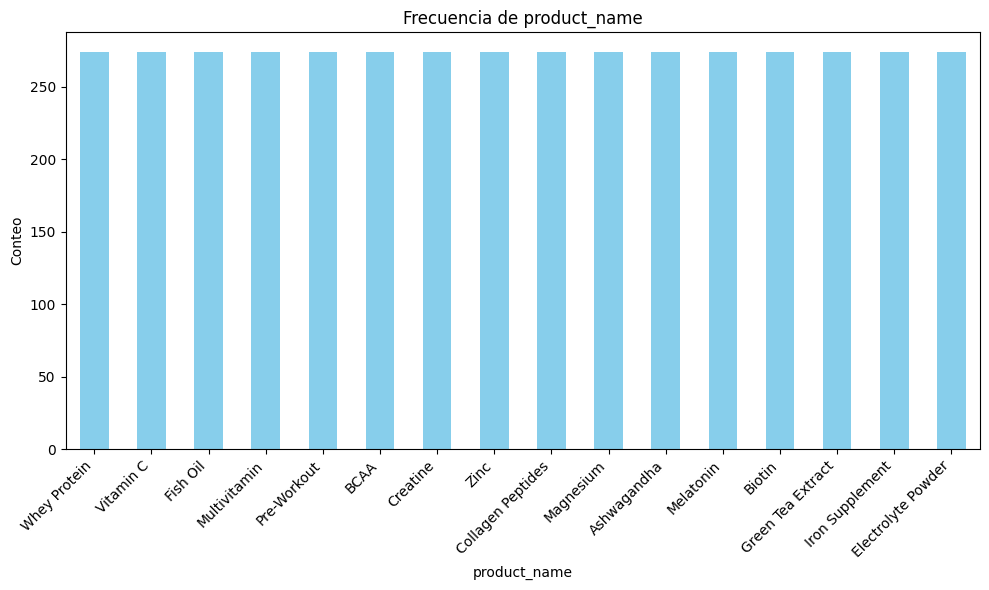


Analizando la columna: category
category
Vitamin        822
Mineral        822
Protein        548
Performance    548
Omega          274
Amino Acid     274
Herbal         274
Sleep Aid      274
Fat Burner     274
Hydration      274
Name: count, dtype: int64


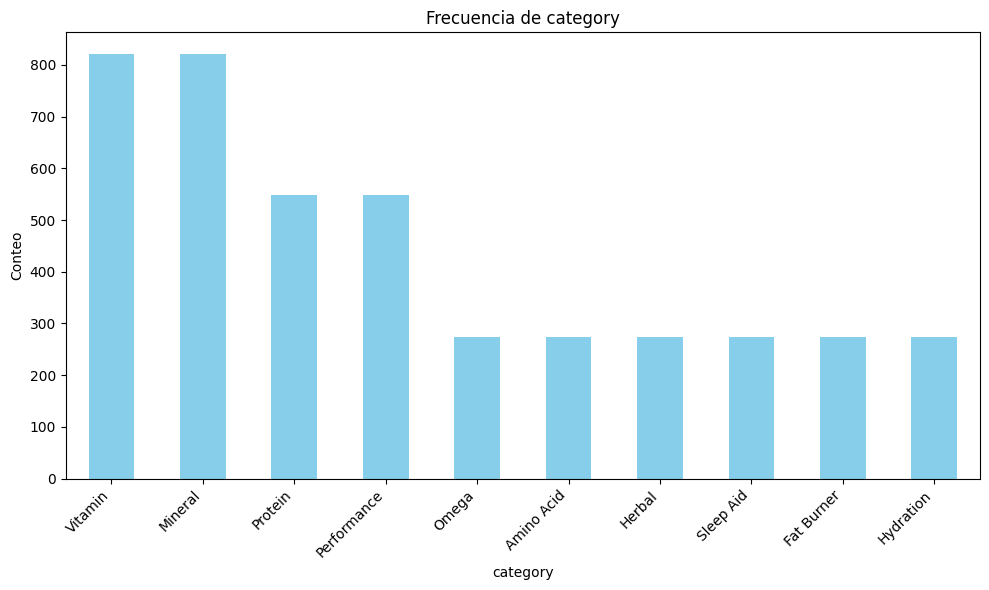


Analizando la columna: location
location
Canada    1507
UK        1475
USA       1402
Name: count, dtype: int64


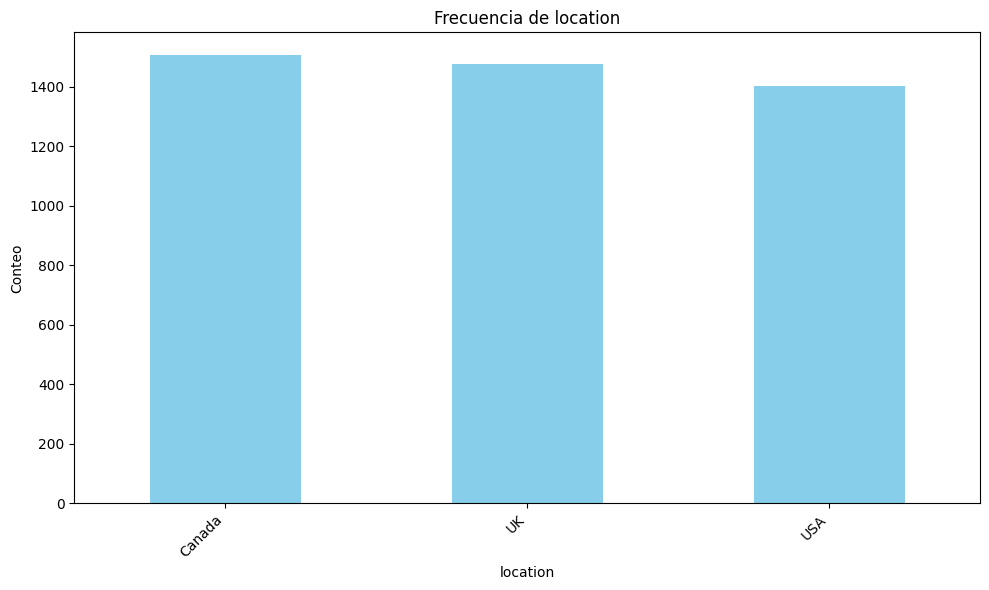


Analizando la columna: platform
platform
iHerb      1499
Amazon     1473
Walmart    1412
Name: count, dtype: int64


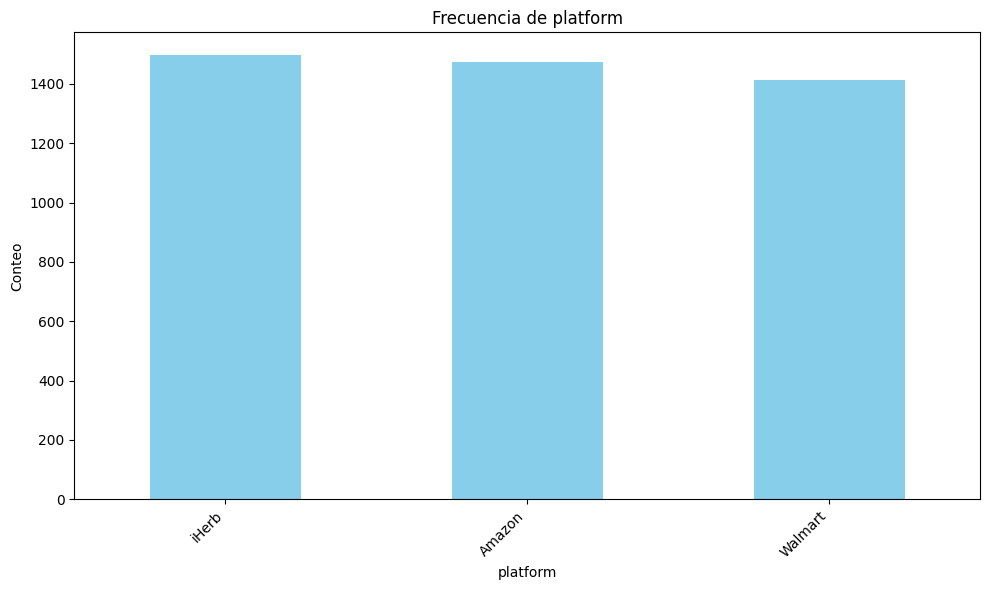

In [24]:
cat_cols = ['product_name', 'category', 'location', 'platform']

print("\n--- Análisis de Columnas Categóricas ---")

# Generar gráficos de barras para cada columna categórica
for col in cat_cols:
    print(f"\nAnalizando la columna: {col}")

    # Contar la frecuencia de cada categoría
    category_counts = df[col].value_counts()
    print(category_counts)

    # Crear un gráfico de barras
    plt.figure(figsize=(10, 6))
    category_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Frecuencia de {col}')
    plt.xlabel(col)
    plt.ylabel('Conteo')
    plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor legibilidad
    plt.tight_layout()
    plt.show()

# Nota adicional: La columna 'date' es de tipo categórico en tu lista.
# Para un análisis de series de tiempo, deberías convertirla a tipo datetime
# usando pd.to_datetime(df['date']) y luego analizar tendencias por tiempo.

--- Tendencia de Ingresos Diarios ---
date
2025-03-27        0.00
2025-03-28        0.00
2025-03-29        0.00
2025-03-30        0.00
2025-03-31    81915.03
Freq: D, Name: revenue, dtype: float64


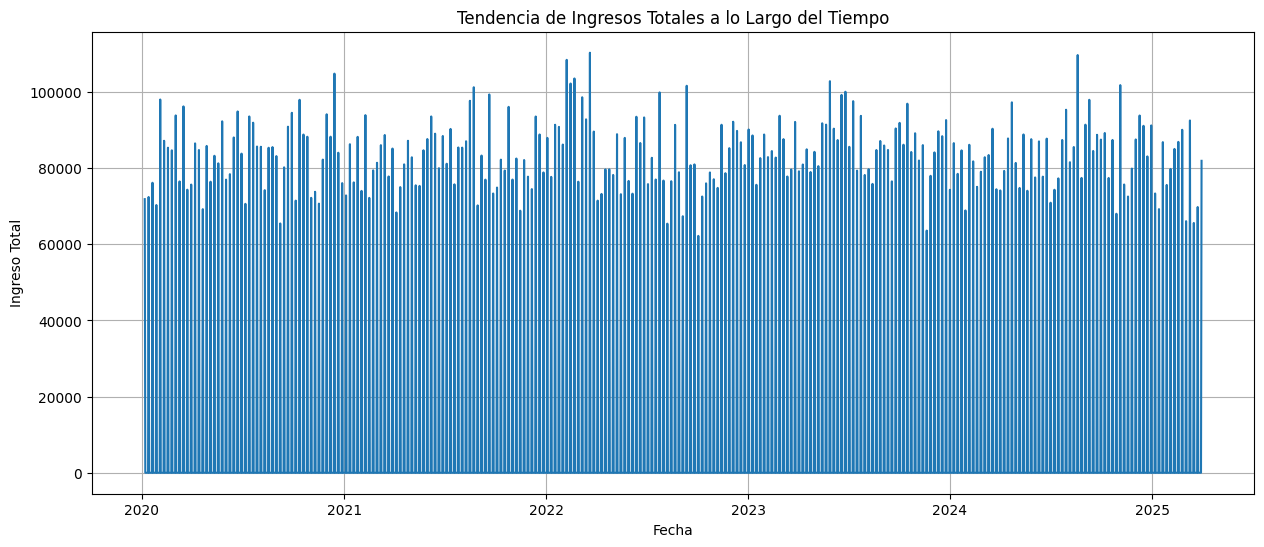


--- Ingreso Promedio por Mes ---
month
1     5027.699190
2     5398.559479
3     5257.005556
4     5016.852083
5     5217.611984
6     5437.135119
7     5254.067727
8     5233.672772
9     5304.873810
10    5159.207841
11    4973.839659
12    5475.971756
Name: revenue, dtype: float64


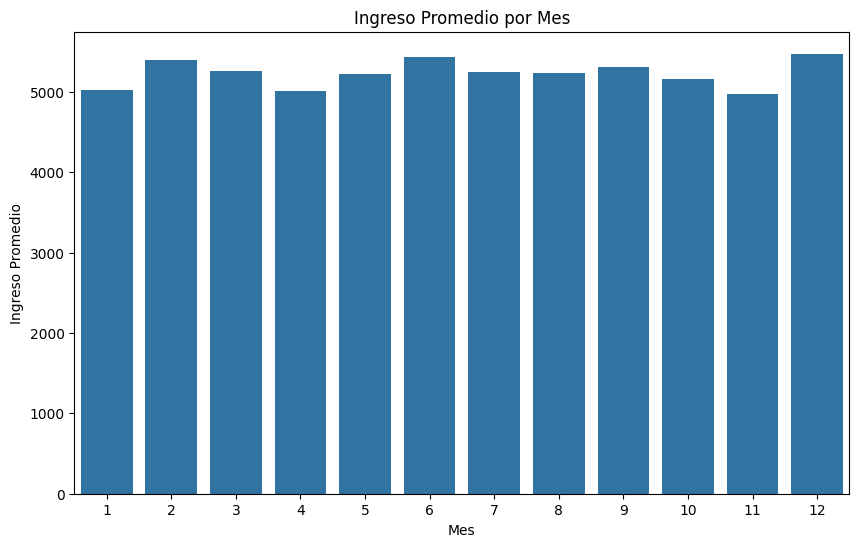


--- Unidades Vendidas Promedio por Día de la Semana ---
day_of_week
Lunes        150.200274
Martes              NaN
Miércoles           NaN
Jueves              NaN
Viernes             NaN
Sábado              NaN
Domingo             NaN
Name: units_sold, dtype: float64


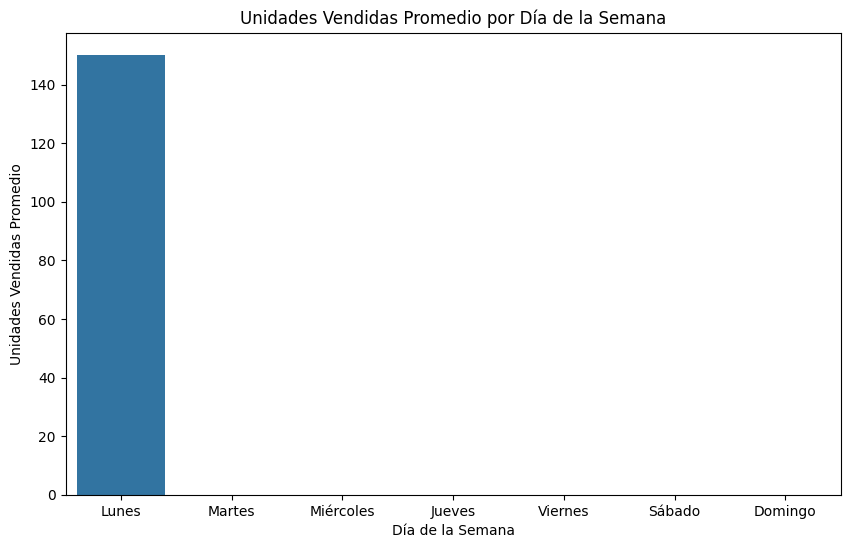

In [25]:

# Paso 1: Convertir la columna 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Paso 2: Análisis de la tendencia a lo largo del tiempo
df.set_index('date', inplace=True)
df_daily_revenue = df['revenue'].resample('D').sum()

print("--- Tendencia de Ingresos Diarios ---")
print(df_daily_revenue.tail())

plt.figure(figsize=(15, 6))
sns.lineplot(data=df_daily_revenue)
plt.title('Tendencia de Ingresos Totales a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ingreso Total')
plt.grid(True)
plt.show()

# Paso 3: Análisis de la estacionalidad mensual
df['month'] = df.index.month
df_monthly_avg_revenue = df.groupby('month')['revenue'].mean()

print("\n--- Ingreso Promedio por Mes ---")
print(df_monthly_avg_revenue)

plt.figure(figsize=(10, 6))
sns.barplot(x=df_monthly_avg_revenue.index, y=df_monthly_avg_revenue.values)
plt.title('Ingreso Promedio por Mes')
plt.xlabel('Mes')
plt.ylabel('Ingreso Promedio')
plt.show()

# Paso 4: Análisis de la estacionalidad semanal
df['day_of_week'] = df.index.dayofweek
# Mapear números a nombres de días
day_map = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
df['day_of_week'] = df['day_of_week'].map(day_map)

df_weekly_avg_units = df.groupby('day_of_week')['units_sold'].mean().reindex(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])

print("\n--- Unidades Vendidas Promedio por Día de la Semana ---")
print(df_weekly_avg_units)

plt.figure(figsize=(10, 6))
sns.barplot(x=df_weekly_avg_units.index, y=df_weekly_avg_units.values)
plt.title('Unidades Vendidas Promedio por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Unidades Vendidas Promedio')
plt.show()

# Restablecer el índice si es necesario para análisis futuros
df.reset_index(inplace=True)

Análisis bivariante

Matriz de Correlación
Una matriz de correlación es la forma más rápida de ver las relaciones entre todas tus variables numéricas. Los valores van de -1 a 1.

1: Correlación positiva perfecta (cuando una variable sube, la otra también).

-1: Correlación negativa perfecta (cuando una sube, la otra baja).

0: Sin correlación.

--- Matriz de Correlación entre Variables Numéricas ---
                units_sold     price   revenue  discount  units_returned
units_sold        1.000000  0.013749  0.210462 -0.010435        0.116523
price             0.013749  1.000000  0.977198 -0.008668       -0.010410
revenue           0.210462  0.977198  1.000000 -0.012531        0.012432
discount         -0.010435 -0.008668 -0.012531  1.000000        0.004276
units_returned    0.116523 -0.010410  0.012432  0.004276        1.000000


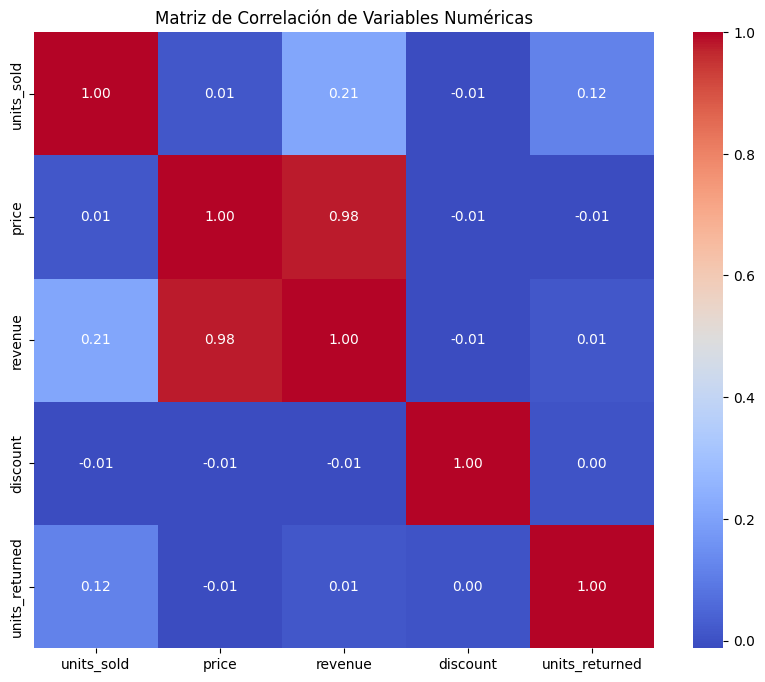

In [26]:
print("--- Matriz de Correlación entre Variables Numéricas ---")
correlation_matrix = df[num_cols].corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

Diagramas de Caja (Boxplots)


--- Boxplots de revenue por Categoría ---


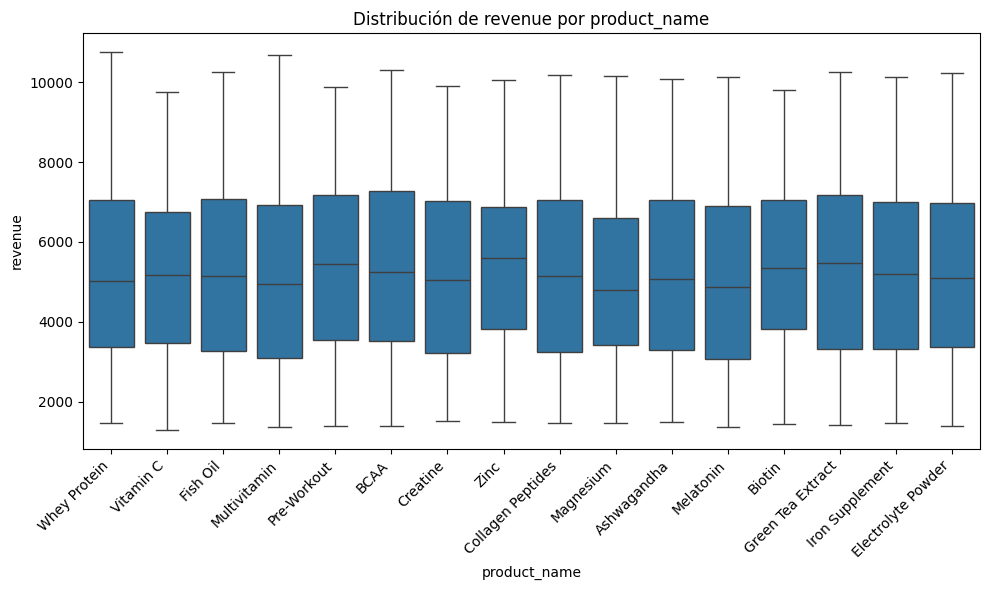

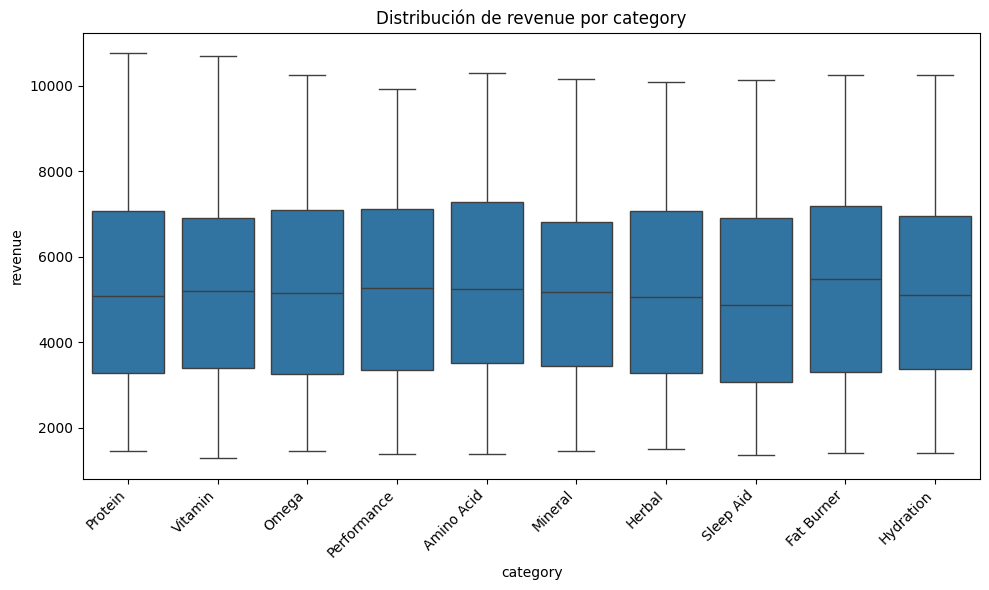

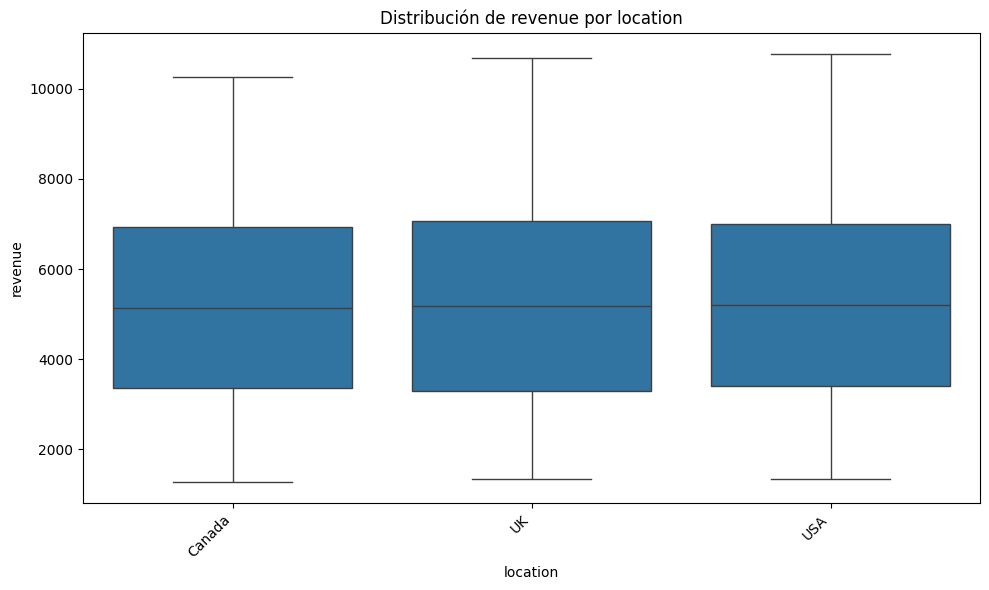

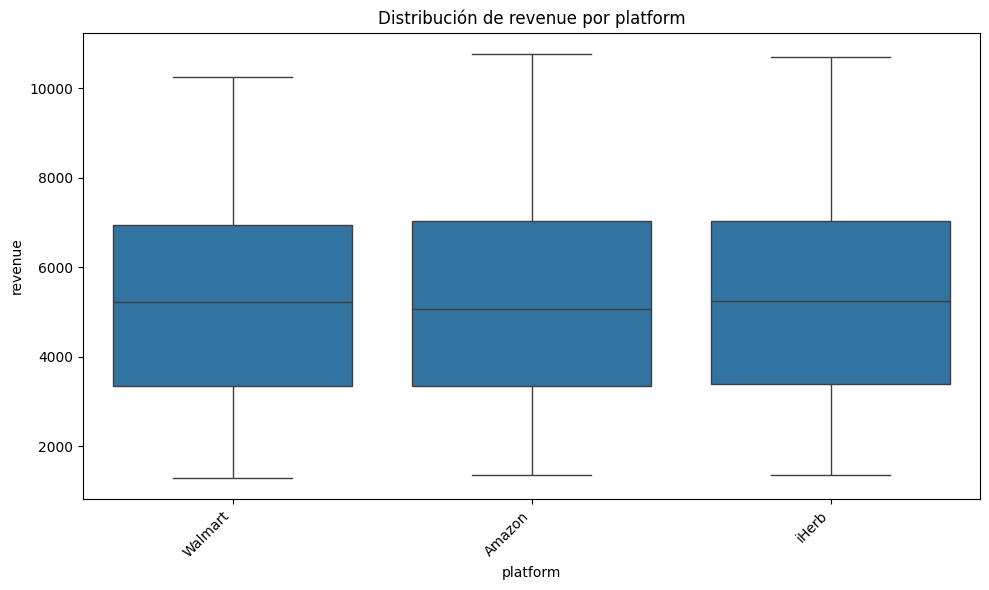

In [27]:

num_var_to_analyze = 'revenue'

print(f"\n--- Boxplots de {num_var_to_analyze} por Categoría ---")

for cat_col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cat_col, y=num_var_to_analyze, data=df)
    plt.title(f'Distribución de {num_var_to_analyze} por {cat_col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


--- Tabla de Contingencia: Ubicación vs. Categoría ---
category  Amino Acid  Fat Burner  Herbal  Hydration  Mineral  Omega  \
location                                                              
Canada            87         102      79         93      279    103   
UK               105          86      95         89      287     88   
USA               82          86     100         92      256     83   

category  Performance  Protein  Sleep Aid  Vitamin  
location                                            
Canada            210      201        101      252  
UK                174      178         81      292  
USA               164      169         92      278  


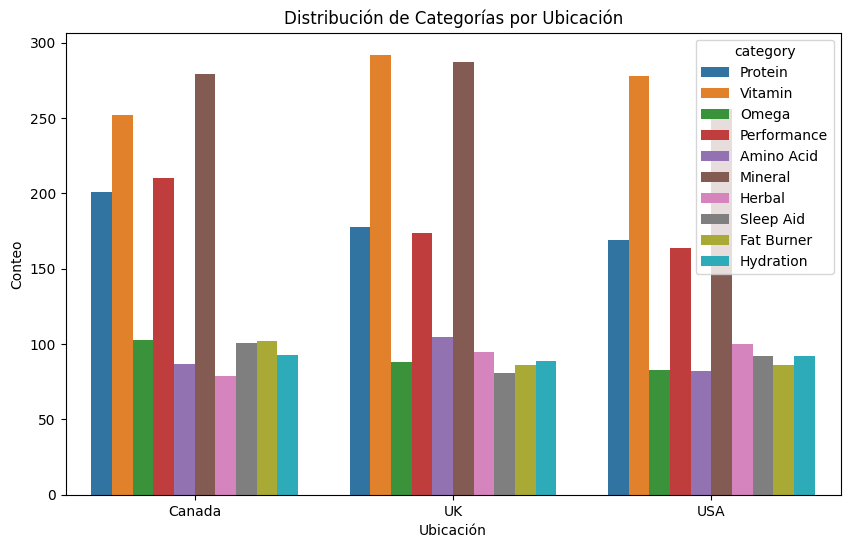

In [28]:
# Analizar la relación entre 'location' y 'category'
print("\n--- Tabla de Contingencia: Ubicación vs. Categoría ---")
contingency_table = pd.crosstab(df['location'], df['category'])
print(contingency_table)

# Visualizar el conteo de 'category' por 'location'
plt.figure(figsize=(10, 6))
sns.countplot(x='location', hue='category', data=df)
plt.title('Distribución de Categorías por Ubicación')
plt.xlabel('Ubicación')
plt.ylabel('Conteo')
plt.show()


# print(pd.crosstab(df['product_name'], df['location']))

# Análisis de Outliers

In [29]:
print("--- Detección de Outliers por el método IQR ---")

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Columna: {col}")
    print(f"  Valores atípicos encontrados: {len(outliers)}")
    print("---------------------------------------")

--- Detección de Outliers por el método IQR ---
Columna: units_sold
  Valores atípicos encontrados: 40
---------------------------------------
Columna: price
  Valores atípicos encontrados: 0
---------------------------------------
Columna: revenue
  Valores atípicos encontrados: 0
---------------------------------------
Columna: discount
  Valores atípicos encontrados: 0
---------------------------------------
Columna: units_returned
  Valores atípicos encontrados: 314
---------------------------------------


# Transformacion de datos

In [30]:
# Función para aplicar el capping a una columna
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Usar np.clip para reemplazar los valores fuera de los límites
    df[column] = np.clip(df[column], lower_bound, upper_bound)

    return df

# Aplicar la función a las columnas con outliers
df = cap_outliers_iqr(df, 'units_sold')
df = cap_outliers_iqr(df, 'units_returned')

# Verificación: ejecutar la detección de outliers de nuevo
print("--- Verificación después de la transformación ---")
for col in ['units_sold', 'units_returned']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_after = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Columna: {col}")
    print(f"  Valores atípicos encontrados: {len(outliers_after)}")
    print("---------------------------------------")

--- Verificación después de la transformación ---
Columna: units_sold
  Valores atípicos encontrados: 0
---------------------------------------
Columna: units_returned
  Valores atípicos encontrados: 0
---------------------------------------


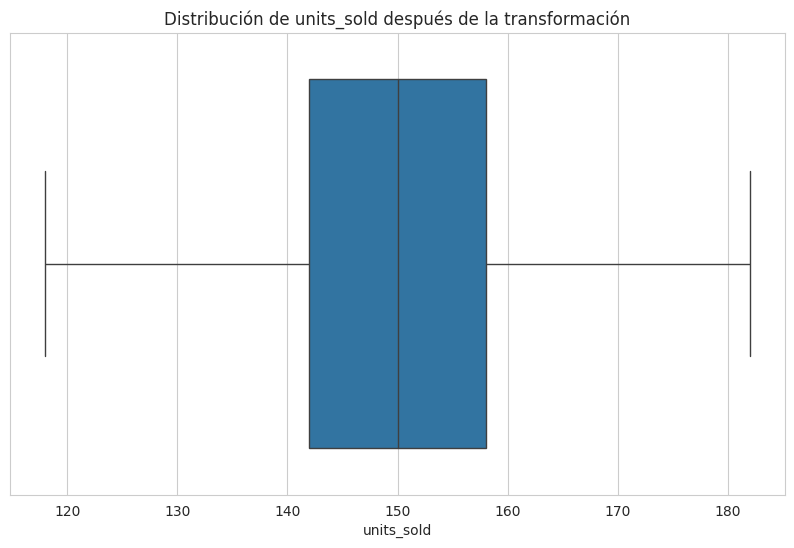

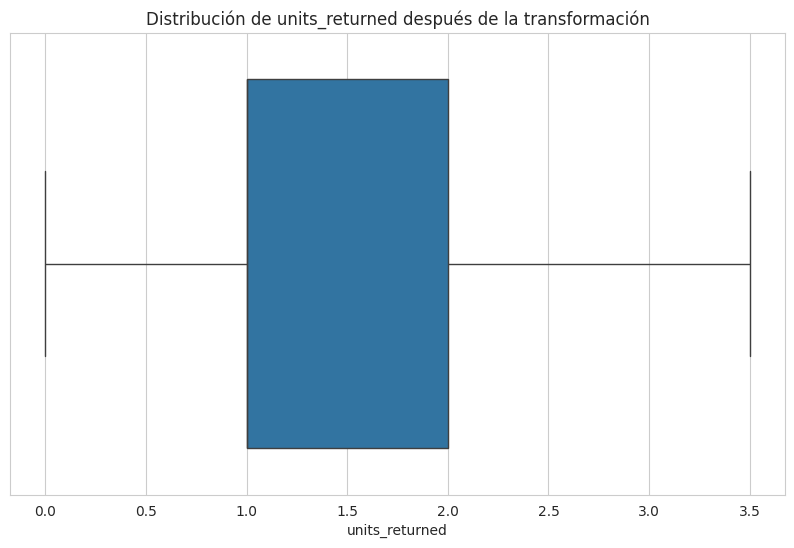

In [ ]:
# Lista de columnas que tenían outliers
cleaned_cols = ['units_sold', 'units_returned']

# Generar un boxplot para cada columna después del capping
for col in cleaned_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Distribución de {col} después de la transformación')
    plt.xlabel(col)
    plt.show()

In [31]:
# === RESUMEN DE HALLAZGOS ===
print("\n=== RESUMEN DE HALLAZGOS ===")

# 1. Calidad de los datos
print("\n1. CALIDAD DE DATOS:")
# Cálculo del porcentaje total de valores faltantes
total_missing_count = df.isnull().sum().sum()
total_cells = len(df) * len(df.columns)
print(f"- Porcentaje total de valores faltantes: {total_missing_count/total_cells*100:.2f}%")

# 2. Distribuciones
print("\n2. ASIMETRÍA (SKEWNESS):")
# Cálculo de la asimetría para las variables numéricas
skewness_values = df[num_cols].skew().sort_values(ascending=False)
print("- Variables con mayor asimetría (distribución sesgada):")
print(skewness_values)
print("\n  Nota: Un valor positivo indica un sesgo a la derecha, uno negativo a la izquierda.")

# 3. Outliers
print("\n3. OUTLIERS (VALORES ATÍPICOS):")
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))]
    print(f"- {col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

# 4. Correlaciones
print("\n4. CORRELACIONES:")
target_var = 'revenue'
print(f"Correlaciones más fuertes con la variable objetivo '{target_var}':")
if target_var in df.columns:
    target_corr = df[num_cols].corr()[target_var].abs().sort_values(ascending=False)
    print(target_corr.head())


=== RESUMEN DE HALLAZGOS ===

1. CALIDAD DE DATOS:
- Porcentaje total de valores faltantes: 0.00%

2. ASIMETRÍA (SKEWNESS):
- Variables con mayor asimetría (distribución sesgada):
units_returned    0.269297
revenue           0.118588
units_sold        0.066219
discount          0.021377
price             0.012604
dtype: float64

  Nota: Un valor positivo indica un sesgo a la derecha, uno negativo a la izquierda.

3. OUTLIERS (VALORES ATÍPICOS):
- units_sold: 0 outliers (0.00%)
- price: 0 outliers (0.00%)
- revenue: 0 outliers (0.00%)
- discount: 0 outliers (0.00%)
- units_returned: 0 outliers (0.00%)

4. CORRELACIONES:
Correlaciones más fuertes con la variable objetivo 'revenue':
revenue           1.000000
price             0.977198
units_sold        0.209572
discount          0.012531
units_returned    0.009846
Name: revenue, dtype: float64


Las columnas en tu DataFrame son: Index(['date', 'product_name', 'category', 'units_sold', 'price', 'revenue',
       'discount', 'units_returned', 'location', 'platform', 'month',
       'day_of_week'],
      dtype='object')


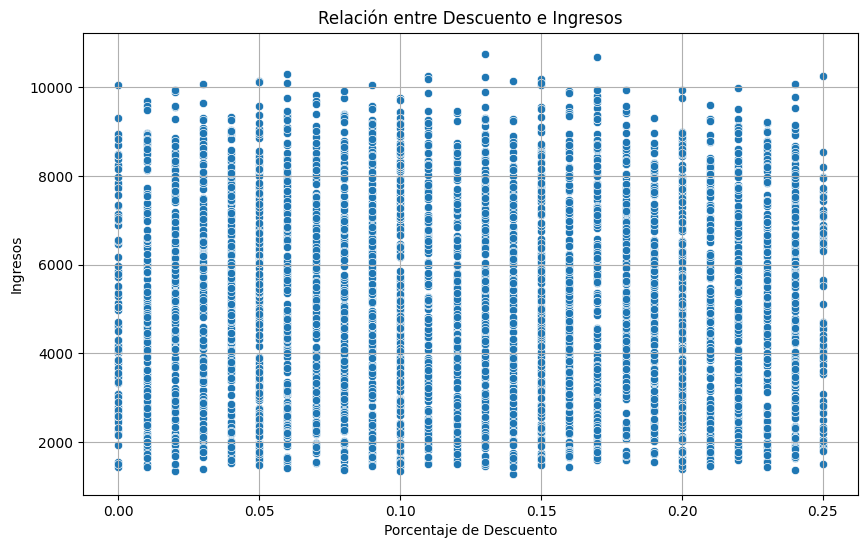

In [33]:
# Verifica las columnas de tu DataFrame para asegurarte de que los nombres son correctos
print("Las columnas en tu DataFrame son:", df.columns)

# Ahora, crea el diagrama de dispersión con los nombres de columna correctos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount', y='revenue', data=df)
plt.title('Relación entre Descuento e Ingresos')
plt.xlabel('Porcentaje de Descuento')
plt.ylabel('Ingresos')
plt.grid(True)
plt.show()

El gráfico revela una relación polinómica entre el descuento y los ingresos, no una relación lineal.

Lo que significa: Inicialmente, a medida que el descuento aumenta, los ingresos también suben. Esto sugiere que los descuentos bajos o moderados son efectivos para atraer clientes y generar más ventas.

El punto de inflexión: Sin embargo, la curva se aplata después de un cierto punto y podría incluso empezar a bajar. Esto indica que un descuento excesivamente alto ya no es tan beneficioso, ya que el menor precio por unidad supera el aumento en la cantidad de unidades vendidas.

In [ ]:

from sklearn.linear_model import LinearRegression
import numpy as np

# Definir la variable predictora (X) y la variable objetivo (y)
X = df[['Discount']]
y = df['Revenue']

# Transformar X para incluir términos polinómicos (ej. x, x^2)
# Un grado=2 es un buen punto de partida para una curva
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Crear y entrenar el modelo (es una regresión lineal sobre los features transformados)
model_polinomico = LinearRegression()
model_polinomico.fit(X_poly, y)

# Imprimir los coeficientes
print("--- Modelo de Regresión Polinómica ---")
print(f"Coeficientes: {model_polinomico.coef_}")
print(f"Intercepto: {model_polinomico.intercept_:.2f}")

# Evaluar el modelo
print(f"R-cuadrado: {model_polinomico.score(X_poly, y):.2f}")

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


# Definir la variable predictora (X) y la variable objetivo (y)
X = df[['discount']]
y = df['revenue']

# Transformar X para incluir términos polinómicos (ej. x, x^2)
# Un grado=2 es un buen punto de partida para una curva
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Crear y entrenar el modelo (es una regresión lineal sobre los features transformados)
model_polinomico = LinearRegression()
model_polinomico.fit(X_poly, y)

# Imprimir los coeficientes
print("--- Modelo de Regresión Polinómica ---")
print(f"Coeficientes: {model_polinomico.coef_}")
print(f"Intercepto: {model_polinomico.intercept_:.2f}")

# Evaluar el modelo
print(f"R-cuadrado: {model_polinomico.score(X_poly, y):.2f}")

--- Modelo de Regresión Polinómica ---
Coeficientes: [  778.15266324 -4637.28715156]
Intercepto: 5225.43
R-cuadrado: 0.00


In [35]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Definir las variables predictoras (X) y la variable objetivo (y)
X = df[['units_sold', 'discount']] # Múltiples variables predictoras
y = df['revenue']

# Crear y entrenar el modelo
model_multiple = LinearRegression()
model_multiple.fit(X, y)

# Imprimir los coeficientes
print("--- Modelo de Regresión Múltiple ---")
print(f"Coeficientes: {model_multiple.coef_}")
print(f"Intercepto: {model_multiple.intercept_:.2f}")

# Evaluar el modelo
print(f"R-cuadrado: {model_multiple.score(X, y):.2f}")

--- Modelo de Regresión Múltiple ---
Coeficientes: [  37.34921681 -316.48310387]
Intercepto: -343.53
R-cuadrado: 0.04


In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# Definir la variable predictora (X) y la variable objetivo (y)
X = df[['discount']]
y = df['units_sold']

# Transformar X para incluir términos polinómicos (ej. x, x^2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Crear y entrenar el modelo
model_units_sold = LinearRegression()
model_units_sold.fit(X_poly, y)

# Evaluar el modelo
print("--- Modelo de Unidades Vendidas vs. Descuento ---")
print(f"R-cuadrado: {model_units_sold.score(X_poly, y):.2f}")

--- Modelo de Unidades Vendidas vs. Descuento ---
R-cuadrado: 0.00


In [37]:
# Crear un rango de descuentos para probar (del 0% al 100%)
descuentos_a_probar = np.linspace(0, 1, 101).reshape(-1, 1)

# Usar el modelo entrenado para predecir las unidades vendidas para cada descuento
descuentos_a_probar_poly = poly_features.fit_transform(descuentos_a_probar)
unidades_predichas = model_units_sold.predict(descuentos_a_probar_poly)

# Usar el precio promedio de tu conjunto de datos
avg_price = df['price'].mean()

# Calcular el ingreso predicho para cada nivel de descuento
ingresos_predichos = unidades_predichas * avg_price * (1 - descuentos_a_probar.flatten())

# Encontrar el índice del descuento que genera el ingreso máximo
descuento_optimo_indice = np.argmax(ingresos_predichos)
descuento_optimo = descuentos_a_probar[descuento_optimo_indice][0]
ingreso_maximo_predicho = ingresos_predichos[descuento_optimo_indice]

print("\n--- Resultado del Análisis de Descuento Óptimo ---")
print(f"El descuento óptimo es: {descuento_optimo * 100:.2f}%")
print(f"Con un ingreso predicho de: ${ingreso_maximo_predicho:.2f}")


--- Resultado del Análisis de Descuento Óptimo ---
El descuento óptimo es: 0.00%
Con un ingreso predicho de: $5231.71
